<a href="https://colab.research.google.com/github/JeswinStan00/EDA-and-Streamlit/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


<Axes: xlabel='Age', ylabel='count'>

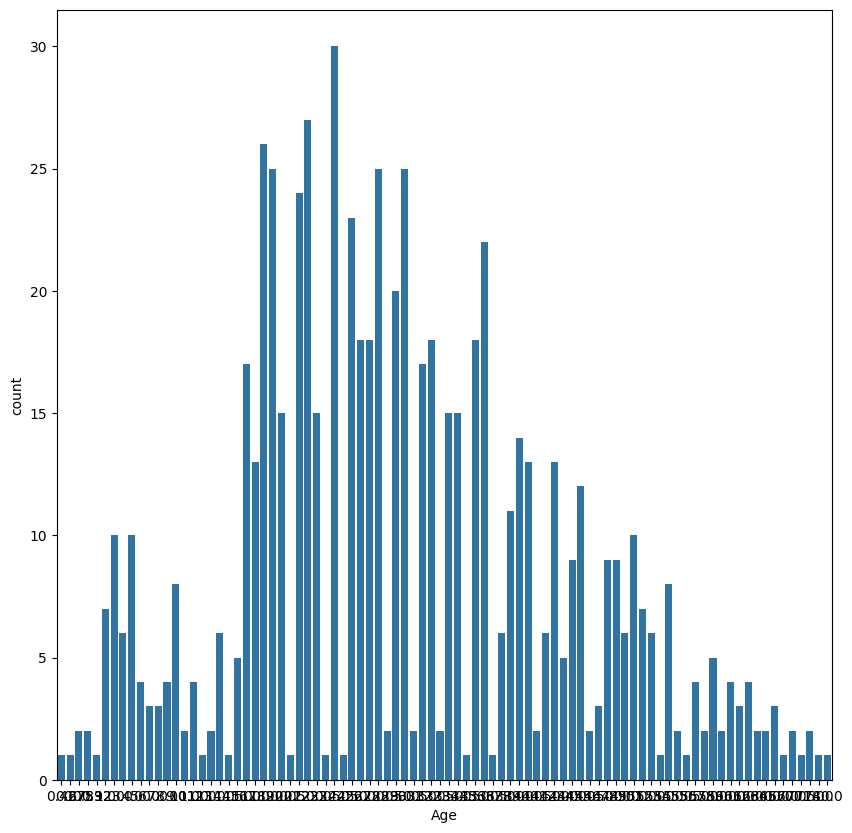

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Age',data=df)

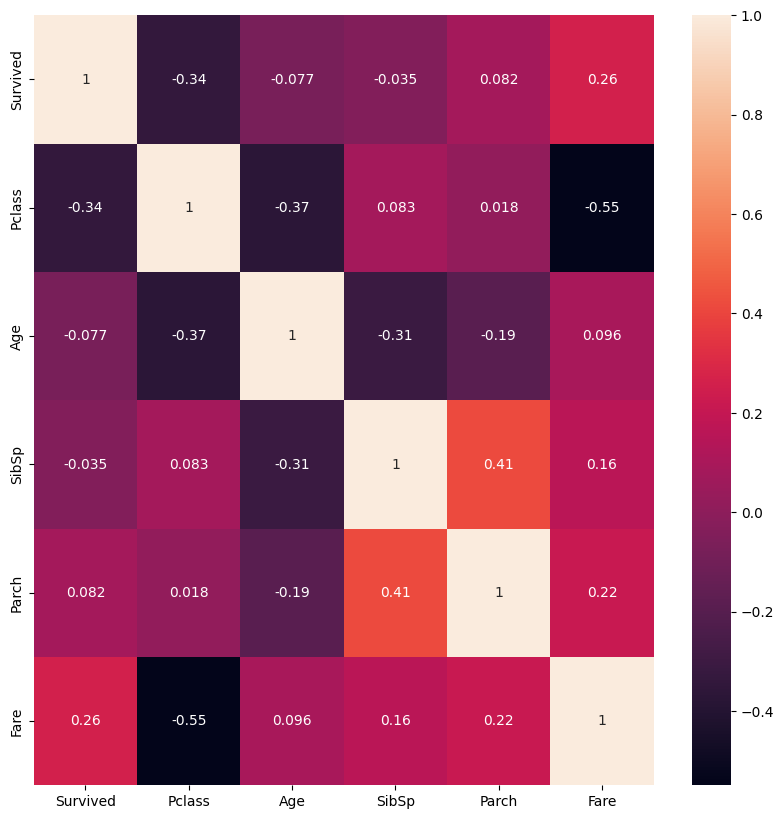

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],axis=1).corr(),annot=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

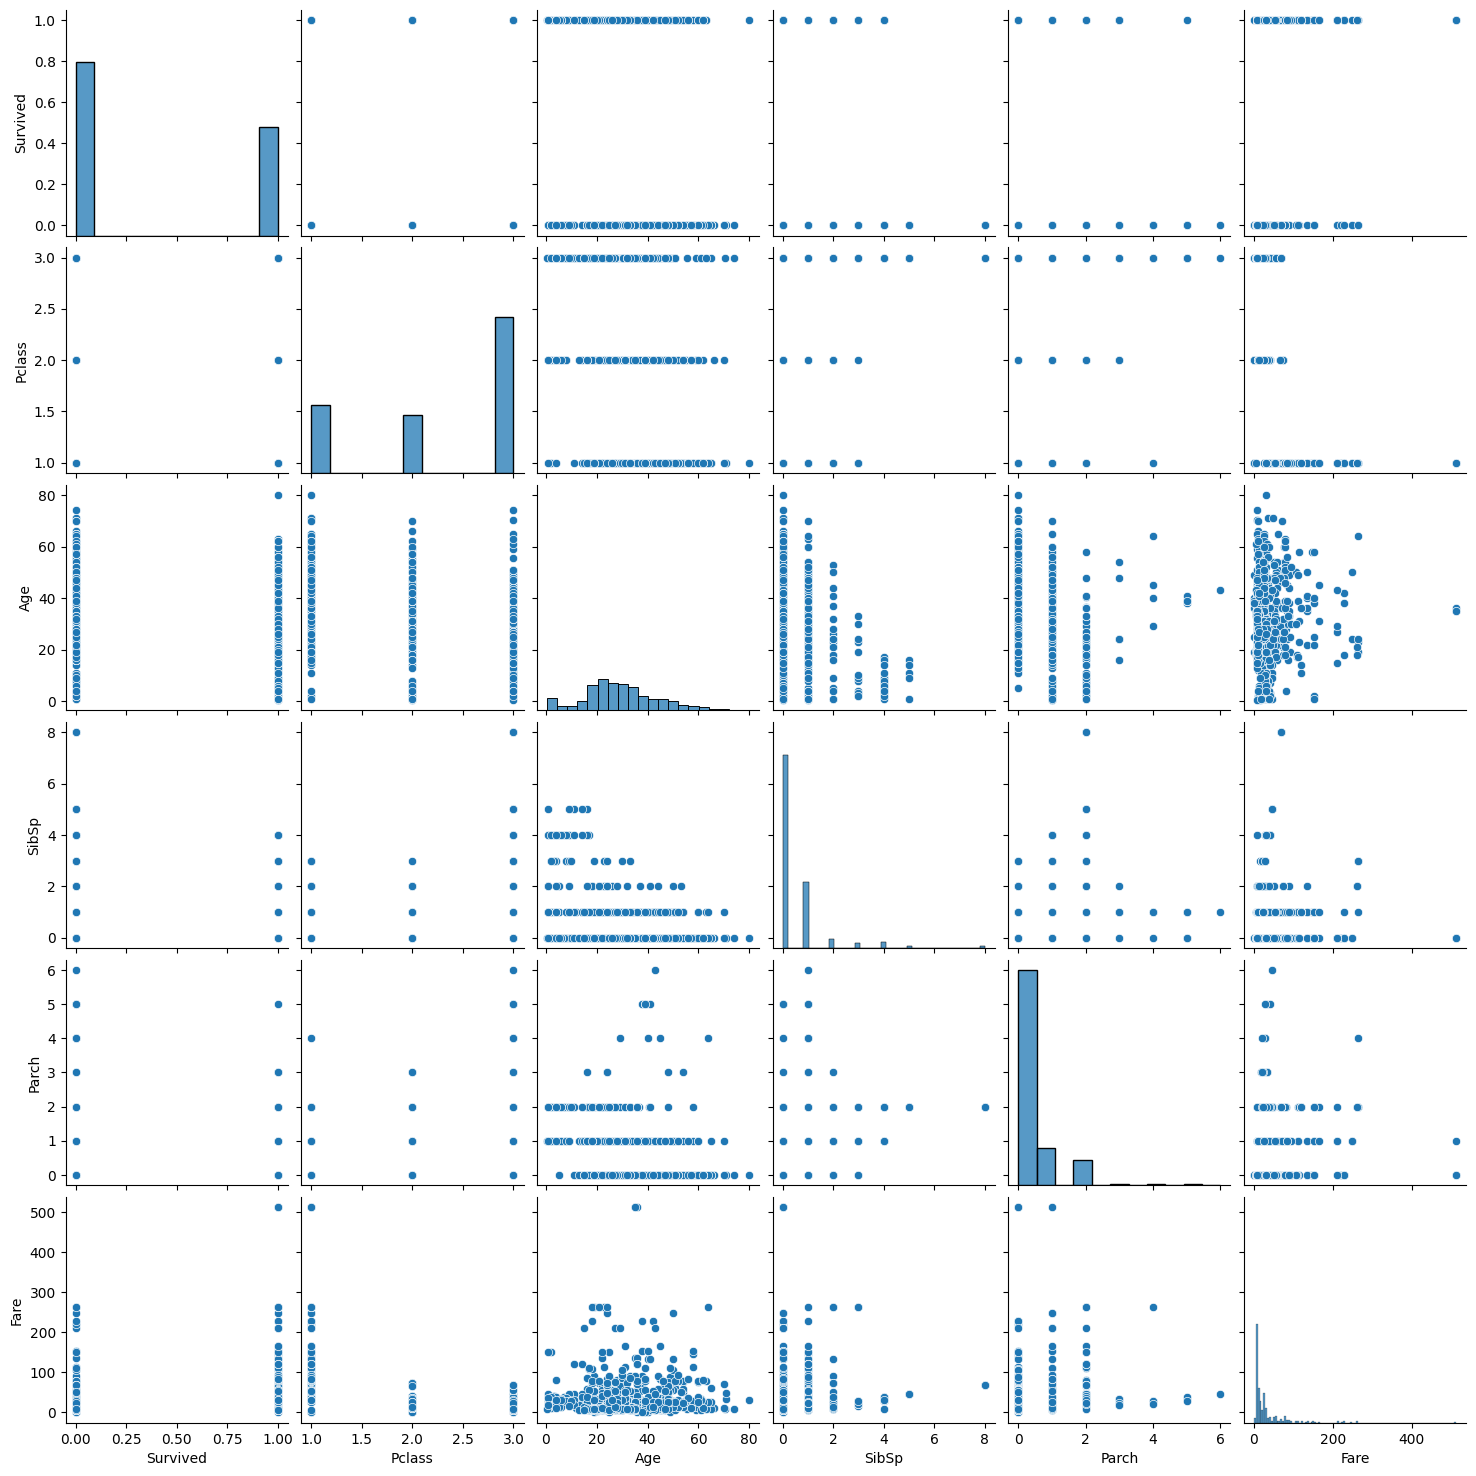

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],axis=1))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Fill missing 'Age' values with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Convert 'Sex' column to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex'], drop_first=True) # Removed redundant call

x=df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Survived'],axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male
709,3,29.699118,1,1,15.2458,True
439,2,31.000000,0,0,10.5000,True
840,3,20.000000,0,0,7.9250,True
720,2,6.000000,0,1,33.0000,False
39,3,14.000000,1,0,11.2417,False
...,...,...,...,...,...,...
433,3,17.000000,0,0,7.1250,True
773,3,29.699118,0,0,7.2250,True
25,3,38.000000,1,5,31.3875,False
84,2,17.000000,0,0,10.5000,False


In [ ]:
df['Cabin']=df['Cabin'].replace('NaN','')
df['Cabin']=df['Cabin'].fillna('')
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,,S,False
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,True


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
s=accuracy_score(y_test,y_pred)
print(f"Accuracy score on test data: {s}")

Accuracy score on test data: 0.8100558659217877


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
s=r2_score(y_test,y_pred)
print(f"R2 score on test data: {s}")

R2 score on test data: 0.4411143627333969


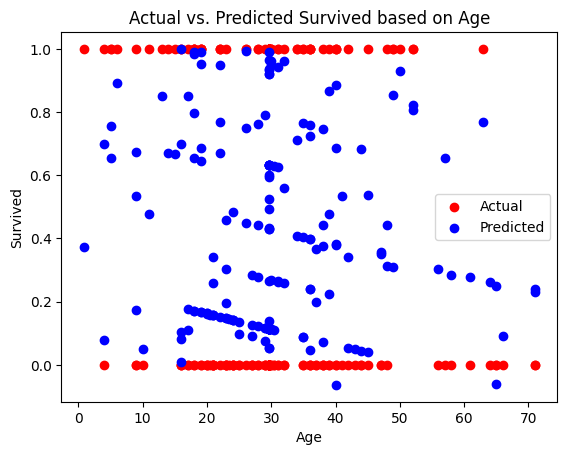

In [ ]:
plt.scatter(x_test['Age'], y_test, color='red', label='Actual')
plt.scatter(x_test['Age'], y_pred, color='blue', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Actual vs. Predicted Survived based on Age')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/Titanic-Dataset.csv")
df

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")



import pickle

with open("RandomForestClassifier.pkl", "wb") as file:
    pickle.dump(model, file)
    print("Model saved successfully as RandomForestClassifier'.pk1'")

Model accuracy: 79.89%
Model saved successfully as RandomForestClassifier'.pk1'


In [ ]:
%%writefile titanic_streamlit.py
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import os


st.title("🚢 Titanic Survival Prediction - Random Forest Classifier")

# File uploader
uploaded_file = st.file_uploader("Upload Titanic Dataset CSV", type=["csv"])

if uploaded_file is not None:
    # Load dataset
    df = pd.read_csv(uploaded_file)
    st.subheader("Dataset Preview")
    st.write(df.head())

    try:
        # Preprocessing
        df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
        df['Age'].fillna(df['Age'].mean(), inplace=True)
        df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

        # Convert categorical to numeric
        df = pd.get_dummies(df, drop_first=True)

        # Features & Target
        X = df.drop('Survived', axis=1)
        y = df['Survived']

        # Train-test split
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Model training
        model = RandomForestClassifier(random_state=42)
        model.fit(x_train, y_train)

        # Predictions
        y_pred = model.predict(x_test)

        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        st.success(f"✅ Model accuracy: {accuracy * 100:.2f}%")

        # Save model
        with open("RandomForestClassifier.pkl", "wb") as file:
            pickle.dump(model, file)

        st.success("💾 Model saved successfully as 'RandomForestClassifier.pkl'")

        # Download link
        with open("RandomForestClassifier.pkl", "rb") as file:
            st.download_button(
                label="⬇ Download Model (.pkl)",
                data=file,
                file_name="RandomForestClassifier.pkl",
                mime="application/octet-stream"
            )

    except Exception as e:
        st.error(f"❌ Error processing file: {e}")

Writing titanic_streamlit.py


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.139.248.10


In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
changed 22 packages in 2s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹

In [ ]:
!lt --port 8000

your url is: https://clean-moons-rest.loca.lt
^C
